### Content

1. [Introdaction](#1.-Introdaction)
2. [Import](#2.-Import)
3. [Read and prepare data](#3.-Read-and-prepare-data)
4. [Visualization of Accelerometer Signals](#4.-Visualization-of-Accelerometer-Signals)
5. [Feature engineering](#5.-Feature-engineering)

### 1. Introdaction

**What is accelerometer?**

An **accelerometer** is a device that measures proper acceleration. Proper acceleration, being the acceleration (or rate of change of velocity) of a body in its own instantaneous rest frame, is not the same as coordinate acceleration, being the acceleration in a fixed coordinate system. For example, an accelerometer at rest on the surface of the Earth will measure an acceleration due to Earth's gravity, straight upwards (by definition) of g ≈ 9.81 m/s2. By contrast, accelerometers in free fall (falling toward the center of the Earth at a rate of about 9.81 m/s2) will measure zero. [More...](https://en.wikipedia.org/wiki/Accelerometer)

**What is my goal?**

I want to collect accelerometer data from my smart phone. And after that i want ot create model, which will predict class of my activity (*for example: running or walking*).


**How will I do it?**

I will collect data with [AndroSensor](https://play.google.com/store/apps/details?id=com.fivasim.androsensor). And I will use this data for modeling.

![app screen](https://github.com/OleksandrKosovan/activity-recognition/blob/master/img/andro-sensor.png?raw=true)

Path to metadata of data collection: **data/metadata/AndroSensorSettings.xml**

### 2. Import 

In [6]:
import os
import datetime

In [4]:
import pandas as pd
import numpy as np

In [24]:
from tqdm import tqdm

In [25]:
from scipy.signal import find_peaks
from scipy.integrate import cumtrapz

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

### 3. Read and prepare data

In [ ]:
def preparator(df, action_name, path, rows_number=ROWS_NUMBER, step_size=STEP_SIZE):
    metrics_number = df.shape[0]//step_size - 14
    if metrics_number == 0:
        return 'Not enought rows...'
    index = 1
    borders = [0, rows_number]
    while index <= metrics_number:
        action_df = pd.DataFrame(columns=COLUMN_NAMES)
        action_df[COLUMN_NAMES[0]] = df[OLD_COLUMN_NAMES[0]][borders[0]:borders[1]]
        action_df[COLUMN_NAMES[1]] = df[OLD_COLUMN_NAMES[1]][borders[0]:borders[1]]
        action_df[COLUMN_NAMES[2]] = df[OLD_COLUMN_NAMES[2]][borders[0]:borders[1]]
        file_name = os.path.join(path, action_name + '-' + str(index) + '.csv')
        action_df.to_csv(file_name, index=False)
        
        # preparation for next step
        borders[0] = borders[0] + step_size
        borders[1] = borders[1] + step_size
        del action_df
        index += 1
    return 'OK'

In [5]:
DATA_PATH = 'data/'
NEW_DATA_PATH = 'prepareted_data/'

In [28]:
os.listdir(DATA_PATH)

['running',
 'idle',
 '.DS_Store',
 'example.csv',
 'final_data.csv',
 'walking',
 '.ipynb_checkpoints',
 'stairs',
 'metadata']

In [7]:
# example of data that AndroSensor return

pd.read_csv(os.path.join(DATA_PATH, 'running/running-1.csv')).head()

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),PROXIMITY (m),LOCATION Latitude :,LOCATION Longitude :,LOCATION Altitude ( m),LOCATION Altitude-google ( m),LOCATION Speed ( Kmh),LOCATION Accuracy ( m),LOCATION ORIENTATION (°),Satellites in range,Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS
0,1.134852,6.569690,7.694965,8.0,49.8286,24.04625,346.0,NaN,3.492,14.5,174.4,13 / 16,27,2020-03-11 20:23:16:854
1,3.921703,2.360683,19.862297,8.0,49.8286,24.04625,346.0,NaN,3.492,14.5,174.4,13 / 16,527,2020-03-11 20:23:17:354
2,0.071826,3.682282,10.390836,8.0,49.8286,24.04625,346.0,NaN,3.492,14.5,174.4,14 / 16,1026,2020-03-11 20:23:17:853
3,-1.800440,4.252103,9.150639,8.0,49.8286,24.04625,346.0,NaN,3.492,14.5,174.4,14 / 16,1526,2020-03-11 20:23:18:353
4,12.670115,5.075708,4.252103,8.0,49.8286,24.04625,346.0,NaN,3.492,14.5,174.4,14 / 16,2026,2020-03-11 20:23:18:853


In [29]:
running_folder = 'running'
idle_folder = 'idle'
walking_folder = 'walking'
stairs_folder = 'stairs'

activity_list = [running_folder, idle_folder, walking_folder, stairs_folder]

In [30]:
ROWS_NUMBER = 30
STEP_SIZE = 2

OLD_COLUMN_NAMES = [
    'ACCELEROMETER X (m/s²)', 
    'ACCELEROMETER Y (m/s²)',
    'ACCELEROMETER Z (m/s²)'
]
COLUMN_NAMES = [
    'accelerometer_X',
    'accelerometer_Y',
    'accelerometer_Z'
]

**Schema of data preparation:**

![img](https://github.com/OleksandrKosovan/activity-recognition/blob/master/img/data-preparation.jpg?raw=true)

In [11]:
for activity in activity_list:
    print(activity, ' prepareting...')
    file_names_list = os.listdir(os.path.join(DATA_PATH, activity))
    for file in tqdm(file_names_list):
        df = pd.read_csv(os.path.join(DATA_PATH, activity, file))
        preparator(
            df=df, 
            action_name=activity, 
            path=os.path.join(NEW_DATA_PATH, activity)
        )

  0%|          | 0/4 [00:00<?, ?it/s]

running  prepareting...


  0%|          | 0/2 [00:00<?, ?it/s]

idle  prepareting...


  0%|          | 0/12 [00:00<?, ?it/s]

walking  prepareting...


  9%|▉         | 1/11 [00:00<00:01,  5.26it/s]

stairs  prepareting...


100%|██████████| 11/11 [00:08<00:00,  1.33it/s]


In [10]:
# checking

for activity in activity_list:
    file_names_list = os.listdir(os.path.join(NEW_DATA_PATH, activity))
    print(activity, ': ', len(file_names_list))

running :  3410
idle :  1041
walking :  1852
stairs :  167


### 4. Visualization of Accelerometer Signals

In [11]:
def plot_3d_trajectory(x, y, z):
    """ 
    Plot 3D Trajectory
    Next we will calculate the phone’s motion 
    by integrating the linear-accelerations, 
    and plot the results.
    """
    x = cumtrapz(x)
    y = cumtrapz(y)
    z = cumtrapz(z)
    
    fig3,ax = plt.subplots()
    fig3.suptitle('3D Trajectory of phone',fontsize=20)
    ax = plt.axes(projection='3d')
    ax.plot3D(x,y,z,c='red',lw=1,label='phone trajectory')
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    ax.set_zlabel('Z position')
    plt.show()

In [12]:
def plot_frequency_spectrum(x, y, z):
    """ Plot Frequency spectrum """
    fig4,[ax1,ax2,ax3] = plt.subplots(3,1,sharex=True,sharey=True)
    fig4.suptitle('Spectrum',fontsize=20)
    ax1.plot(x,c='r',label='x')
    ax1.legend()
    ax2.plot(y,c='b',label='y')
    ax2.legend()
    ax3.plot(z,c='g',label='z')
    ax3.legend()
    ax3.set_xlabel('Freqeuncy (Hz)')
    plt.show()

In [13]:
def select_random_df(folder_name):
    custom_path = os.path.join(NEW_DATA_PATH, folder_name)
    data = pd.read_csv(os.path.join(custom_path, os.listdir(custom_path)[0]))
    x = data.accelerometer_X.values
    y = data.accelerometer_Y.values
    z = data.accelerometer_Z.values
    return x, y, z

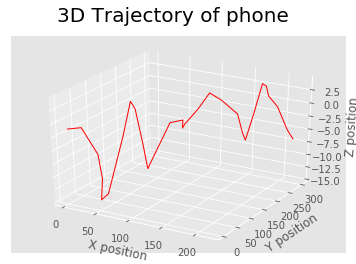

In [14]:
# running
x,y,z = select_random_df(running_folder)
plot_3d_trajectory(x, y, z)

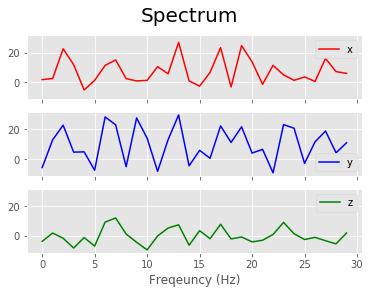

In [15]:
plot_frequency_spectrum(x, y, z)

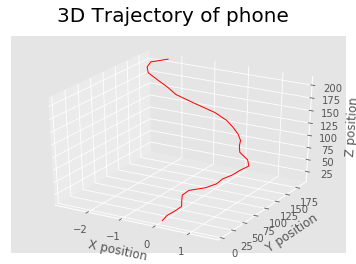

In [16]:
# idle
x,y,z = select_random_df(idle_folder)
plot_3d_trajectory(x, y, z)

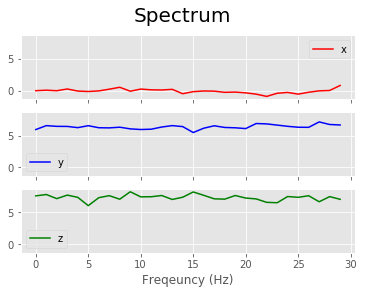

In [17]:
plot_frequency_spectrum(x, y, z)

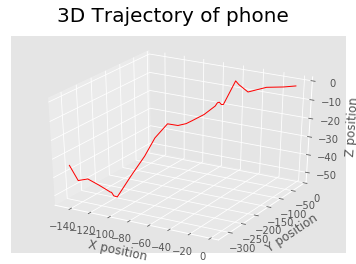

In [18]:
# walking
x,y,z = select_random_df(walking_folder)
plot_3d_trajectory(x, y, z)

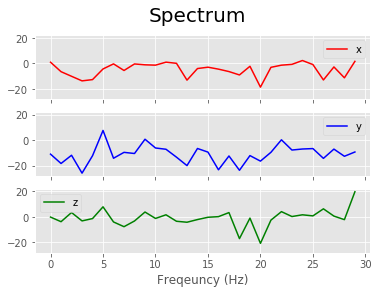

In [19]:
plot_frequency_spectrum(x, y, z)

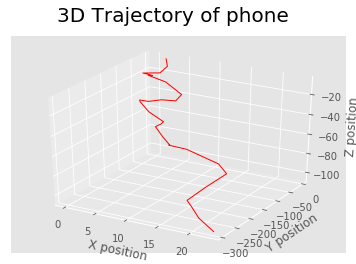

In [20]:
# stairs
x,y,z = select_random_df(stairs_folder)
plot_3d_trajectory(x, y, z)

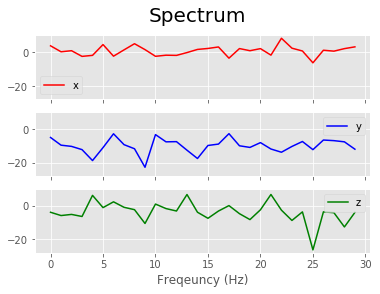

In [21]:
plot_frequency_spectrum(x, y, z)

### 5. Feature engineering

In this section we report the notation and the preliminary definitions that we use throughout the paper. For sake of readability they have also be summarized in Table I. We denote $f$ as the index of a frame containing $N$ threeaxis accelerometer samples $s_{j, n}^{f},$ which is the $n$ -th sample, $n \in[1, N],$ of the $j$ -th axis, $j \in\{x, y, z\}$ for the $f$ -th frame. In the remaining of the paper, when it is not strictly necessary to distinguish among the three axes components, we omit the axis index $j .$ Consequently, the accelerometer sample containing the three axis components $\left\{s_{x, n}^{f}, s_{y, n}^{f}, s_{z, n}^{f}\right\}$ is denoted with $\mathbf{s}_{n}^{f}$
The employed features for each $j$ -th axis are: $i$ ) mean $\left(\mu_{j}^{f}\right),$ ii) standard deviation $\left(\sigma_{j}^{f}\right),$ and iii number of peaks $\left(P_{j}^{f}\right) .$ Being well-known the formulae for $\mu_{j}^{f}$ and $\sigma_{j}^{f},$ we only report the definition of $P_{j}^{f}:$
$$
\begin{array}{c}
P_{j}^{f}=\sum_{n} \rho_{j, n}^{f} \\
\rho_{j, n}^{f}=\left\{\begin{array}{ll}
1, & \text { if }\left(s_{j, n+1}^{f}-s_{j, n}^{f}\right)\left(s_{j, n}^{f}-s_{j, n-1}^{f}\right)<0,\left\|s_{j, n}^{f}\right\| \geq \epsilon \\
0, & \text { otherwise }
\end{array}\right.
\end{array}
$$

The quantity $\epsilon$ is a threshold employed to define a signal peak, empirically set to $\epsilon=0.75$ by of means of practical trials.

In [31]:
def mean_calculator(three_axis):
    """ Return mean of each vectors """
    three_axis = np.array(three_axis)
    vector_x = three_axis[:, 0]
    vector_y = three_axis[:, 1]
    vector_z = three_axis[:, 2]
    x_mean = np.mean(vector_x)
    y_mean = np.mean(vector_y)
    z_mean = np.mean(vector_z)
    return x_mean, y_mean, z_mean

In [32]:
def std_calculator(three_axis):
    """ Return standart deviation of each vectors """
    three_axis = np.array(three_axis)
    vector_x = three_axis[:, 0]
    vector_y = three_axis[:, 1]
    vector_z = three_axis[:, 2]
    x_std = np.std(vector_x)
    y_std = np.std(vector_y)
    z_std = np.std(vector_z)
    return x_std, y_std, z_std

In [33]:
def peaks_calculator(three_axis):
    """ Return number of peaks of each vectors """
    three_axis = np.array(three_axis)
    vector_x = three_axis[:, 0]
    vector_y = three_axis[:, 1]
    vector_z = three_axis[:, 2]
    x_peaks = len(find_peaks(vector_x)[0])
    y_peaks = len(find_peaks(vector_y)[0])
    z_peaks = len(find_peaks(vector_z)[0])
    return x_peaks, y_peaks, z_peaks

In [34]:
def feature_engineer(action, target, df):
    try:
        x_mean, y_mean, z_mean = mean_calculator(action)
        x_std, y_std, z_std = std_calculator(action)
        x_peaks, y_peaks, z_peaks = peaks_calculator(action)
    except:
        print(action.shape, target)
    dictionary = {
        'x_mean': x_mean,
        'y_mean': y_mean, 
        'z_mean': z_mean,
        'x_std': x_std, 
        'y_std': y_std,
        'z_std': z_std,
        'x_peaks': x_peaks, 
        'y_peaks': y_peaks, 
        'z_peaks': z_peaks,
        'target': target
    }
    df = df.append(
        dictionary, 
        ignore_index=True
    )
    return df

In [35]:
columns = [
    'x_mean', 'y_mean', 'z_mean', 
    'x_std', 'y_std', 'z_std', 
    'x_peaks', 'y_peaks', 'z_peaks',
    'target'
]
dataframe = pd.DataFrame(columns=columns)

In [36]:
for activity in activity_list:
    activity_files = os.listdir(os.path.join(NEW_DATA_PATH, activity))
    for file in activity_files:
        try:
            df = pd.read_csv(os.path.join(NEW_DATA_PATH, activity, file))
            array = df.to_numpy()
            dataframe = feature_engineer(
                action=array, 
                target=activity, 
                df=dataframe
            )
        except:
            print('some error')

(0, 1) running
some error
some error
(0, 1) idle
some error
some error
(0, 1) walking
some error
some error
(0, 1) stairs
some error
some error


In [37]:
print(dataframe.shape)
dataframe.head()

(6462, 10)


,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_peaks,y_peaks,z_peaks,target
0,7.409416,9.976958,-0.256978,8.627367,11.912025,5.343059,9,11,9,running
1,5.468038,6.951644,1.152409,7.209416,9.627981,7.018684,11,10,9,running
2,7.893204,8.591353,-0.739170,10.567628,11.142983,9.375746,10,9,8,running
3,6.006893,8.418812,-0.534067,9.679843,17.851874,5.058515,8,10,9,running
4,8.396306,9.223423,2.074177,10.749277,12.921490,8.827352,9,8,9,running


In [38]:
dataframe.target.unique()

array(['running', 'idle', 'walking', 'stairs'], dtype=object)

In [39]:
dataframe['target'].value_counts()

running    3408
walking    1850
idle       1039
stairs      165
Name: target, dtype: int64

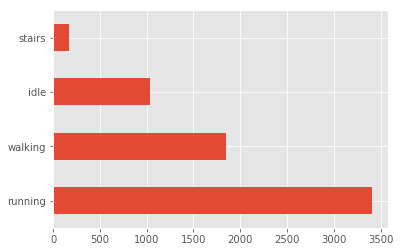

In [40]:
dataframe['target'].value_counts().plot(kind='barh')

In [41]:
# data frame to csv
dataframe.to_csv('data/final_data.csv', index=False)